# Continuous Product Blending

This case study is modeled after an actual process used to prepare an over-the-counter pediatric medication. The situation has been simplified to the dissolution of a single active ingredient into a suspension, and adapted to continouous rather than batch operation.

The process objective is to mix an active ingredient $A$ into a suspension $S$, providing enough time to fully mix and dissolve components coming from both streams. The feed concentration of $A$ is 200 grams/liter. Process requirements include:

* The final product concentration must be in the range 7.8 to 8.2 grams/liter. 
* At all timses the mixer residence time, $\frac{V}{q_{out}}$, must remain between 84 and 108 hours.
* The volume cannot exceed the tank capacity of 15,000 liters, and cannot fall below the 8,000 liters required to fully cover the mixing blades.

The outlet from the tank is fed directly to a packaging line. The flow demand can vary due to changes in speed of the packaging equipment.



## 1 Preliminary Control Analysis 

### 1.1 Parameters

| Quantity | Symbol | Value | Units |
|:-:|:-:|:-:|:-:|
| Feed Concentration |$c_{A,f}$ | 200 | g/liter |
| Maximum Tank Operating Capacity | $V$ | 15,000 | liters |
| Minimum Tank Operating Capacity | $V$ | 8,000 | liters |

### 1.2 Control Objectives

* Maintain outlet concentration of $A$ at $8.0 \pm 0.2$ grams/liter.
* Maintain an average residence time (i.e., ratio $V/q_{out}$) of $96 \pm 12$ hours.
* Past operation has shown a liquid volume of 12,000 liters generally meets nominal demand. Demand, however, fluctuates and is determined by the downstream packaging line.

### 1.3 Classification of Variables

What are the disturbances variables (DV), manipulated variables (MV), and controlled variables (CV)?

| Variable | Symbol | Classification |
|:-:|:-:|:-:|
| Outlet Flow | $q_{out}$ | DV |
| Feed Flow | $q_A$ | MV |
| Water Makeup Flow | $q_W$ | MV |
| Product Concentration | $c_A$ | CV |
| Volume | $V$ | CV |

In this case, we can assume the controlled variables are directly measureable.

### 1.4 Degrees of Freedom Analysis

At steady-state the balance equations become algebraic equations

\begin{align}
0 & = \bar{q}_A + \bar{q}_S - \bar{q}_{out} \\
& \\
0 & = \bar{q}_A c_{A,f} - \bar{q}_{out}\bar{c}_A
\end{align}

There are a total of five variables in these two equations. So we need to find at least three more specifciations or constraints to determine values for these variables. 

Additional pieces of information we have are the process specifications

\begin{align}
\frac{\bar{q}_{out}}{\bar{V}} & = 96 \mbox{ hours} \\
c_{A,f} & = 200 \mbox{ g/liter} \\
\bar{q}_{out} & = \mbox{ set by the downstream demand} \\
\bar{c}_A & = 8 \mbox{ g/liter}
\end{align}

This is a total of four new equations for steady-state.  The new equations introduced an additional variable $\bar{V}$. This provides six variables in six equations provided we know the downstream demand.

### 1.5 Steady State

Let's assume a constant output demand $\bar{q}_{out}$ = 125 liters/hr.  The equations may then be solved in order:

\begin{align}
c_{A,f} & = 200 \mbox{ g/liter} \\
\bar{c}_A & = 8 \mbox{ g/liter} \\
\bar{V} & = 96\ \bar{q}_{out} = 12,000 \mbox{ liters}\\
\bar{q}_A & = \frac{\bar{q}_{out}\bar{c}_A}{c_{A,f}} = 5 \mbox{ liters/hr}\\
\bar{q}_S & = \bar{q}_{out} - \bar{q}_A = 120 \mbox{ liters/hr}
\end{align}

### 1.6 Exercise 1. Determine Operating Range

Solve the steady-state equations for other values of $\bar{q}_{out}$. Given a maximum tank operating capacity of 15,000 liters, what is the largest possible value of $\bar{q}_{out}$ which still meets process specifications?  If the minimum tank operating capacity is 8,000 liters, what is the minimum value of $\bar{q}_{out}$?

## 2 Modeling

The balance equations are

\begin{align}
\frac{dV}{dt} & = q_A + q_S - q_{out} \\
\frac{d(Vc_A)}{dt} & = q_A c_{A,f} - q_{out}c_A
\end{align}

where we have made the assumption of constant density among all of the streams, and of complete and uniform mixing in the stirred tank. 

For simulation, it is useful to isolate the derivatives of $V$ and $c_A$ on the left-hand side of these differential equations. Using the chain rule

\begin{align}
\frac{dV}{dt} & = q_A + q_S - q_{out} \\
V\frac{dc_A}{dt} + c_A\frac{dV}{dt} & = q_A c_{A,f} - q_{out}c_A
\end{align}

Substituting the first equation into the second gives

\begin{align}
\frac{dV}{dt} & = q_A + q_S - q_{out} \\
V\frac{dc_A}{dt} + c_A\left(q_A + q_S - q_{out}\right) & = q_A c_{A,f} - q_{out}c_A
\end{align}

Rearranging terms, and dividing the second equation by $V$, gives us the final version of a dynamical model.

\begin{align}
\frac{dV}{dt} & = q_A + q_S - q_{out} \\
\frac{dc_A}{dt} & = \frac{q_A}{V} \left(c_{A,f} - c_A\right) - \frac{q_S}{V} c_A
\end{align}

## 3 Simulation

###  Step 1. Imports

We start the simulation by importing necessary Python libraries.

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

###  Step 2. Parameter Values

It is good coding practice to include all relevant parameter values in single block of code. This makes it easier for users of your code to understand what values are relevant to the problem, and to adjust and maintain your code. No 'magic' numbers should appear later in your code.

In [4]:
# parameters
caf       = 200       # g/liter
Vmax      = 15000     # liters
Vmin      = 8000      # liters

# process setpoints
ca_SP     = 8         # g/liter
rtime_SP  = 96        # residence time in hours

# nominal values of the disturbance variables
qout_bar  = 125

###  Step 3. Computing Steady State

A good modeling practice is to begin with the determination of a nominal steady state. By nominal we mean operating conditions representative of typical, desired behavior of the process in question, and should be computed based on the parameter values given above.

In [5]:
# nominal steady state at process setpoint
V_bar    = rtime_SP * qout_bar
ca_bar   = ca_SP
qa_bar   = ca_SP*qout_bar/caf
qs_bar   = qout_bar - qa_bar

print("Steady-State")
print("    V [liters]    = ", V_bar)
print("   ca [g/liter]   = ", ca_bar)
print("   qa [liters/hr] = ", qa_bar)
print("   qs [liters/hr] = ", qs_bar)

Steady-State
    V [liters]    =  12000
   ca [g/liter]   =  8
   qa [liters/hr] =  5.0
   qs [liters/hr] =  120.0


### Step 4. Process Model Equations

In our case the model consists of a system of two differential equations. For simulation with the Python function `odeint`, the model is encapsulated into a Python function that accepts two arguments.

* `X` is a list of values for the model state, in this case `V` and `ca`.
* `t` a variable containing value corresponding to the current time.

In [6]:
def deriv(X, t):
    V, ca = X
    dV = qa + qs - qout
    dca = qa*(caf - ca)/V - qs*ca/V
    return [dV, dca]

### Step 5. Numerical Solution of the Process Model

This block does the numerically intensive portion of the simulation. Here we establish values for all degrees of freedeom, specify initial conditions, and thne proceed to compute a history of the process behavior. The history is broken into discrete time step which is a bit more work now, but will later provide a means to test implementations of control algorithms.

For the first simulation, it usually a good idea to pick an initial condition that will yield a known result. In this case we start a simulation at steady state.

In [7]:
# fix all degrees of freedom 
qout = qout_bar      # outlet flow -- process disturbance variable.
qa = qa_bar          # inlet flow of A -- process manipulated variable
qs = qs_bar          # inlet flow of suspension -- process manipulated variable

# establish initial conditions
t  = 0
V  = V_bar
ca = ca_bar

# time step, and variable to store simulation record (or history)
dt = 1
history = [[t,V,ca]]

while t < 500:
    V, ca = odeint(deriv, [V, ca], [t, t+dt])[-1]
    t += dt
    history.append([t,V,ca])

history[0:10]

[[0, 12000, 8],
 [1, 12000.0, 8.0],
 [2, 12000.0, 8.0],
 [3, 12000.0, 8.0],
 [4, 12000.0, 8.0],
 [5, 12000.0, 8.0],
 [6, 12000.0, 8.0],
 [7, 12000.0, 8.0],
 [8, 12000.0, 8.0],
 [9, 12000.0, 8.0]]

### Step 6. Visualization and Analysis

To simplify future simulations, here we define a function to plot the results stored in the simulation record. The function `plot_history(history, labels)` takes two arguments. The first argument is the data history recorded during the course of the simulation, where the first element is assumed to be time. The second argument is a list of labels corresponding to each of the recorded variables.

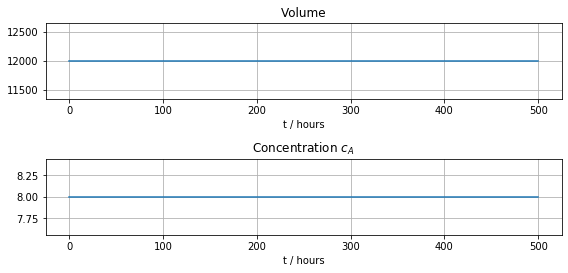

In [8]:
def plot_history(history, labels):
    """Plots a simulation history."""
    history = np.array(history)
    t = history[:,0]
    n = len(labels) - 1
    plt.figure(figsize=(8,1.95*n))
    for k in range(0,n):
        plt.subplot(n, 1, k+1)
        plt.plot(t, history[:,k+1])
        plt.title(labels[k+1])
        plt.xlabel(labels[0])
        plt.grid()
    plt.tight_layout()
        
plot_history(history, ['t / hours','Volume','Concentration $c_A$'])

### Exercise 2. Explore Dynamical Behavior

Let's explore the behavior of this mixing tank under different assumptions.  We'll explore the following cases:

1. The startup concentration of $A$ is $c_A = 0$. How long before the mixer is producing an acceptable product?
2. The outlet flow increases by 10%.  How long before the product is out of spec?
3. The outlet flow decreases by 10%.  How long before the product is out of spec?

The following cell shows how you might get started with first question.

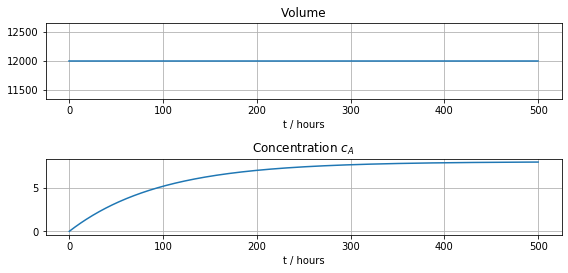

In [9]:
# fix all degrees of freedom 
qout = qout_bar      # outlet flow -- process disturbance variable.
qa = qa_bar          # inlet flow of A -- process manipulated variable
qs = qs_bar          # inlet flow of suspension -- process manipulated variable

# establish initial conditions
t  = 0
V  = V_bar
ca = 0         # <========= CHANGED TO AN INITIAL CONDITION OF ZERO

# time step, and variable to store simulation record (or history)
dt = 1
history = [[t,V,ca]]

while t < 500:
    V, ca = odeint(deriv, [V, ca], [t, t+dt])[-1]
    t += dt
    history.append([t,V,ca])

plot_history(history, ['t / hours','Volume','Concentration $c_A$'])

## 4 Control Residence Time

From the exercises above, we know even small changes in the outlet flowrate results in substantial loss due to out-of-spec product.  Let's try a control strategy in which we change in the suspension flowrate, $q_S$, to compensate for excursions from the desired value of residence time.

We'll try proportional control where the change in $q_S$ is proportional to the difference of the residence time from the setpoint.

\begin{align}
q_S - \bar{q}_S = - K \left(\frac{V}{q_{out}} - \frac{\bar{V}}{\bar{q}_{out}}\right)
\end{align}

The negative sign is there because we expect a negative deviation in flowrate is needed to compensate for a positive deviation in residence time.  This can be written more directly as

\begin{align}
q_S = \bar{q}_S - K \left(\frac{V}{q_{out}} - \frac{\bar{V}}{\bar{q}_{out}}\right)
\end{align}

In the following cell we will decrease qout by 10%, and attempt to find a value for $K$ that provides satisfactory control.

[[0, 12000, 8, 96.0, 120.0], [1, 11959.166666666668, 8.035509853298985, 106.30370370370372, 66.66666666666664], [2, 11920.148148148151, 8.069705251733414, 105.95687242798357, 68.48148148148141], [3, 11882.863786008233, 8.102624867563824, 105.62545587562873, 70.21563786008215], [4, 11847.236506630088, 8.134307046741174, 105.30876894782301, 71.87272062185635], [5, 11813.192661890975, 8.164789759134347, 105.00615699458645, 73.45615526088494]]


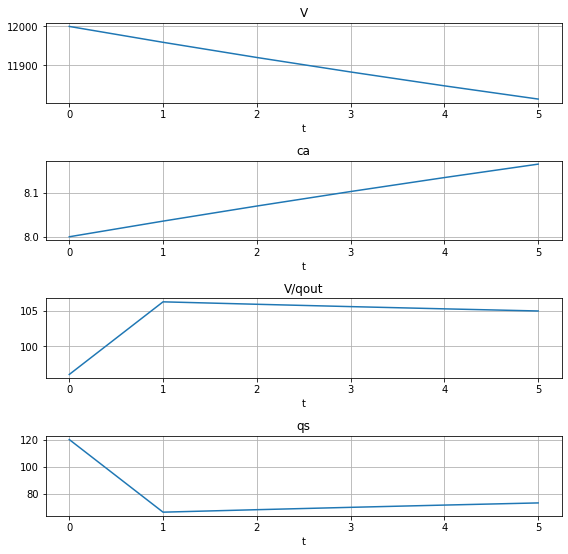

In [16]:
# fix all degrees of freedom 
qout = qout_bar      # outlet flow -- process disturbance variable.
qa = qa_bar          # inlet flow of A -- process manipulated variable
qs = qs_bar          # inlet flow of suspension -- process manipulated variable

# establish initial conditions
t  = 0
V  = V_bar
ca = ca_bar

# time step, and variable to store simulation record (or history)
dt = 1
history = [[t, V, ca, V/qout, qs]]

qout = 0.9*qout
while t < 5:
    qs = qs_bar - 5*(V/qout - V_bar/qout_bar)
    V, ca = odeint(deriv, [V, ca], [t, t+dt])[-1]
    t += dt
    history.append([t, V, ca, V/qout, qs])
print(history)

plot_history(history, ['t','V','ca','V/qout','qs'])

## 5 Control Concentration

As shown above, it isn't enough to control only residence time. In fact, controlling residence time in response to a decrease in output causes the outlet concentration to increase beyond the product quality limits. We propose to fix this problem by controlling $q_A$, the inlet flow of $A$. A proportional control rule is given by

\begin{align}
q_A & = \bar{q}_A - K \left(c_A - \bar{c}_A \right)
\end{align}

where, again, we predict a decrease in $q_A$ is needed to compensate for a positive excursion in $c_A$.

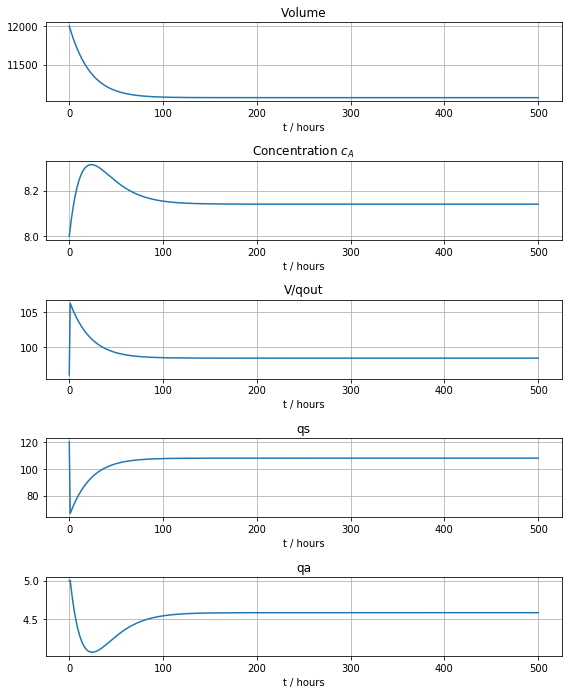

In [11]:
# fix all degrees of freedom 
qout = qout_bar      # outlet flow -- process disturbance variable.
qa = qa_bar          # inlet flow of A -- process manipulated variable
qs = qs_bar          # inlet flow of suspension -- process manipulated variable

# establish initial conditions
t  = 0
V  = V_bar
ca = ca_bar

# time step, and variable to store simulation record (or history)
dt = 1
history = [[t, V, ca, V/qout, qs, qa]]

qout = 0.9*qout
while t < 500:
    qs = qs_bar - 5*(V/qout - V_bar/qout_bar)
    qa = qa_bar - 3*(ca - ca_bar)
    V, ca = odeint(deriv, [V, ca], [t, t+dt])[-1]
    t += dt
    history.append([t, V, ca, V/qout, qs, qa])

plot_history(history, ['t / hours','Volume','Concentration $c_A$','V/qout','qs','qa'])

## Exercise 3.

The algebraic formulae given above do not include any limits on flowrate.  Suppose the flowrate $q_s$ is limited to 0 to 200 liters/hour, and the flowrate $q_a$ is limited to 0 to 20 liters/hour. Modify the code above to incorporate those limits. Now try to find the minimum time necessary to bring the tank from initial concentration of 0 to state where it is producing an acceptable product.

## 7 Proportional-Integral Control

The above control laws do a reasonable job of control, but do not return the system to a desired steady-state operating condition. How can we modify the control laws?

\begin{align}
q_A & = \bar{q}_A - K_p \left(c_A - \bar{c}_A \right) - K_i \int_0^t \left(c_A - \bar{c}_A \right) dt
\end{align}

The second term will integrate any constant offset to produce a constantly changing value.  So the only possible steady-state is when $c_A = \bar{c}_A$.

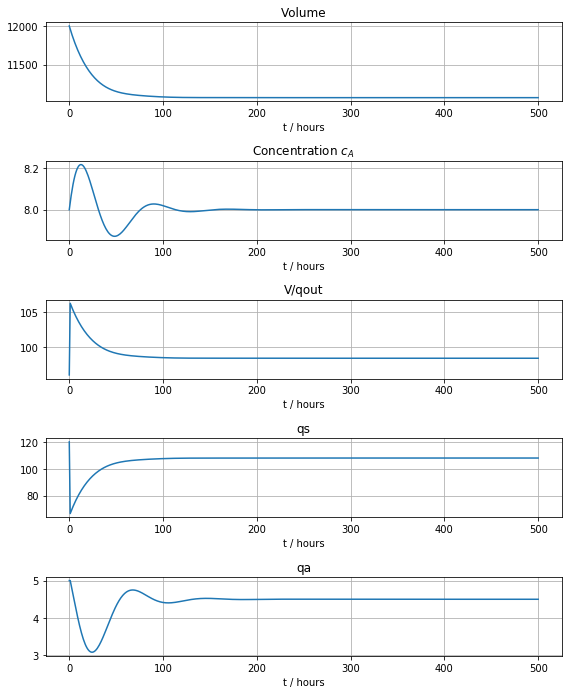

In [12]:
# fix all degrees of freedom 
qout = qout_bar      # outlet flow -- process disturbance variable.
qa = qa_bar          # inlet flow of A -- process manipulated variable
qs = qs_bar          # inlet flow of suspension -- process manipulated variable

# establish initial conditions
t  = 0
V  = V_bar
ca = ca_bar
error_sum = 0

# time step, and variable to store simulation record (or history)
dt = 1
history = [[t, V, ca, V/qout, qs, qa]]

qout = 0.9*qout
while t < 500:
    qs = qs_bar - 5*(V/qout - V_bar/qout_bar)
    
    error = (ca - ca_bar)
    error_sum += error * dt
    
    qa = qa_bar - 3*error - 0.4*error_sum
    V, ca = odeint(deriv, [V, ca], [t, t+dt])[-1]
    t += dt
    history.append([t, V, ca, V/qout, qs, qa])

plot_history(history, ['t / hours','Volume','Concentration $c_A$','V/qout','qs','qa'])

## Exercise 4.

Write an expression for the proportional-integral control of residence time.  Implement the control, and 'tune' the control constants until you get satisfactory feedback control for a 10% reduction in demand.  By satisfactory we mean:

* Meet product quality specifications at all times.
* There are no more than three observable peaks in any underdamped response.
* The decay ratio is less than 0.25.

Is it possible to meet these control specifications?